<a href="https://colab.research.google.com/github/Stephen-Gordon/python_cnn_image_classification/blob/main/image_classification_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#https://www.cs.toronto.edu/~kriz/cifar.html
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [7]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [8]:
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)


x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(10)(x)

#x = layers.Dropout(0.5)(x)
outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


In [9]:

# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.5776 - accuracy: 0.4366 - val_loss: 1.3475 - val_accuracy: 0.5158
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3594 - accuracy: 0.5172 - val_loss: 1.2137 - val_accuracy: 0.5720
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2817 - accuracy: 0.5458 - val_loss: 1.2389 - val_accuracy: 0.5782
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2325 - accuracy: 0.5663 - val_loss: 1.1625 - val_accuracy: 0.5894
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1930 - accuracy: 0.5758 - val_loss: 1.1570 - val_accuracy: 0.5943
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1676 - accuracy: 0.5864 - val_loss: 1.1628 - val_accuracy: 0.5979
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1377 - accuracy: 0.5993 - val_loss: 1.1259 - val_accur

313/313 - 1s - loss: 1.3519 - accuracy: 0.6433 - 716ms/epoch - 2ms/step


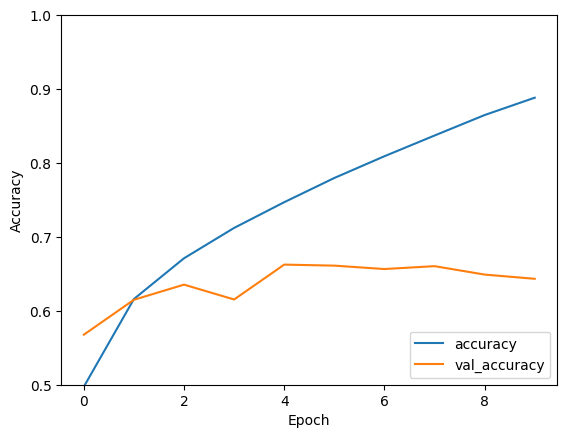

In [6]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

:

In [64]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6438000202178955
